#### Arno河水位预测

https://www.kaggle.com/hanafi99/acea-smart-water-analytics-arno?select=Aquifer_Doganella.csv

In [98]:
import torch
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf

In [2]:
arno = pd.read_csv('./acea-water-prediction/River_Arno.csv')

In [3]:
arno

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,04/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,05/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,26/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.34
8213,27/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.21
8214,28/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.30
8215,29/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.19


In [5]:
arno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8217 entries, 0 to 8216
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8217 non-null   object 
 1   Rainfall_Le_Croci          6026 non-null   float64
 2   Rainfall_Cavallina         6026 non-null   float64
 3   Rainfall_S_Agata           6026 non-null   float64
 4   Rainfall_Mangona           6026 non-null   float64
 5   Rainfall_S_Piero           6026 non-null   float64
 6   Rainfall_Vernio            4283 non-null   float64
 7   Rainfall_Stia              1283 non-null   float64
 8   Rainfall_Consuma           1283 non-null   float64
 9   Rainfall_Incisa            4568 non-null   float64
 10  Rainfall_Montevarchi       1647 non-null   float64
 11  Rainfall_S_Savino          1283 non-null   float64
 12  Rainfall_Laterina          1283 non-null   float64
 13  Rainfall_Bibbiena          2378 non-null   float

In [6]:
arno.head()

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,04/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,05/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88


In [7]:
arno.shape

(8217, 17)

<AxesSubplot:>

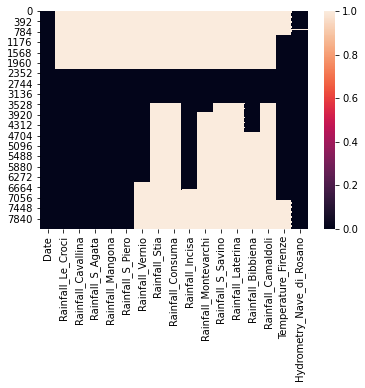

In [10]:
sns.heatmap(arno.isnull())#黑色非null，浅色null

In [15]:
#用附近地区的降水量填补一些没有数据的地方
arno.iloc[3474:4569+1,-9] = arno.iloc[3474:4569+1,-4]
arno.iloc[3474:4569+1,-10] = arno.iloc[3474:4569+1,-4]
arno.iloc[3474:4569+1,-3] = arno.iloc[3474:4569+1,-4]
arno.iloc[3474:6764+1,-5] = arno.iloc[3474:6764+1,-8]
arno.iloc[3474:6764+1,-6] = arno.iloc[3474:6764+1,-8]
arno.iloc[3839:6764+1,-7] = arno.iloc[3839:6764+1,-8]
arno.iloc[4569:6764+1,-3] = arno.iloc[4569:6764+1,-8]
arno.iloc[4569:6764+1,-4] = arno.iloc[4569:6764+1,-8]
arno.iloc[4569:6764+1,-9] = arno.iloc[4569:6764+1,-8]
arno.iloc[4569:6764+1,-10] = arno.iloc[4569:6764+1,-8]
arno.iloc[6474:6764+1,-11] = arno.iloc[6474:6764+1,-13]

<AxesSubplot:>

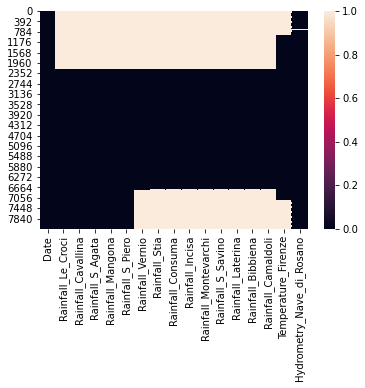

In [16]:
sns.heatmap(arno.isnull())

In [17]:
# moving target data 1 day, this could be explored later
# NN MSE for Number_days = 3 : 0.007
Number_days = 4
arno['Rainfall_Vernio'] = arno['Rainfall_Vernio'].shift (-Number_days)
arno['Rainfall_Mangona'] = arno['Rainfall_Mangona'].shift (-Number_days)
arno['Rainfall_S_Agata'] = arno['Rainfall_S_Agata'].shift (-Number_days)
arno['Rainfall_S_Piero'] = arno['Rainfall_S_Piero'].shift (-Number_days)
arno['Rainfall_Le_Croci'] = arno['Rainfall_Le_Croci'].shift (-Number_days)
arno['Rainfall_Cavallina'] = arno['Rainfall_Cavallina'].shift (-Number_days)

# dropping all rows that contain a null value
arno_1 = arno.dropna(how='any',axis=0).copy()

In [29]:
arno_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4560 entries, 2191 to 6759
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       4560 non-null   object 
 1   Rainfall_Le_Croci          4560 non-null   float64
 2   Rainfall_Cavallina         4560 non-null   float64
 3   Rainfall_S_Agata           4560 non-null   float64
 4   Rainfall_Mangona           4560 non-null   float64
 5   Rainfall_S_Piero           4560 non-null   float64
 6   Rainfall_Vernio            4560 non-null   float64
 7   Rainfall_Stia              4560 non-null   float64
 8   Rainfall_Consuma           4560 non-null   float64
 9   Rainfall_Incisa            4560 non-null   float64
 10  Rainfall_Montevarchi       4560 non-null   float64
 11  Rainfall_S_Savino          4560 non-null   float64
 12  Rainfall_Laterina          4560 non-null   float64
 13  Rainfall_Bibbiena          4560 non-null   fl

<AxesSubplot:>

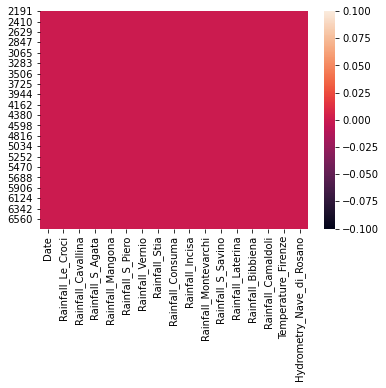

In [20]:
sns.heatmap(arno_1.isnull())

<AxesSubplot:>

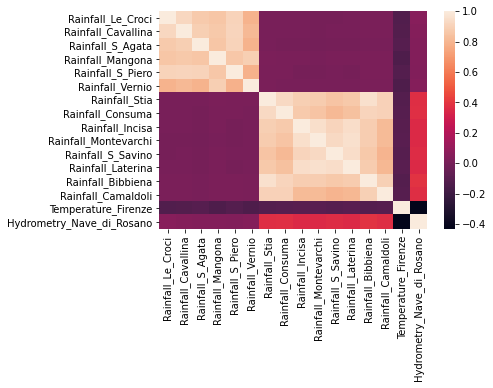

In [21]:
sns.heatmap(arno_1.corr())

In [22]:
#解析时间
arno_1['Day'] = arno_1['Date'].str.split('/').str[0]
arno_1['Month'] = arno_1['Date'].str.split('/').str[1]
arno_1['Year'] = arno_1['Date'].str.split('/').str[2]


Text(0.5, 1.0, 'Hydrometry_Nave_di_Rosano')

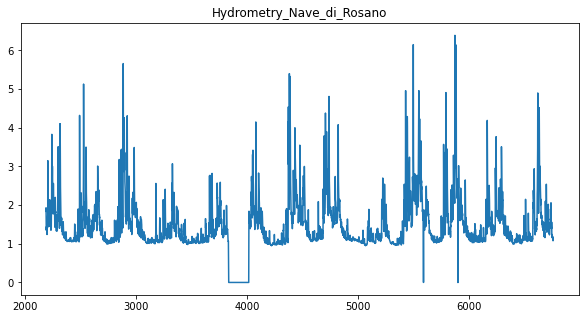

In [26]:
plt.figure(1,figsize = (10,5))
plt.plot(arno_1.Hydrometry_Nave_di_Rosano)
plt.title("Hydrometry_Nave_di_Rosano")
#认为hydrometry不应该出现0

In [27]:
#对出现0的地方做插值
arno_1.Hydrometry_Nave_di_Rosano.replace(0, np.nan, inplace=True)
arno_1.Hydrometry_Nave_di_Rosano.interpolate(method ='pchip', limit_direction ='forward', inplace=True)

Text(0.5, 1.0, 'Lake Level')

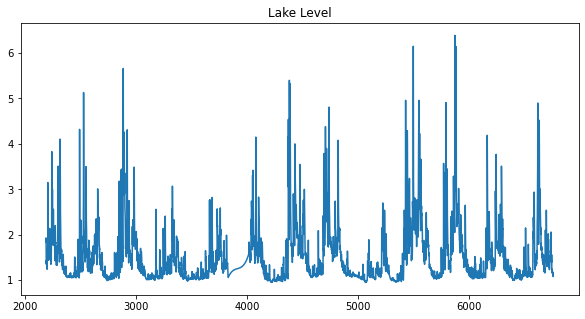

In [28]:
plt.figure(1,figsize = (10,5))
plt.plot(arno_1.Hydrometry_Nave_di_Rosano)
plt.title("Lake Level")

#### 地点归类

* 靠近arno河的点
* 通过sieve河被arno影响的点

In [30]:
from sklearn.preprocessing import StandardScaler

In [33]:
arno_T = arno_1.T#转置

In [48]:
arno_T

,2191,2192,2193,2194,2195,2196,2197,2198,2199,2200,...,6750,6751,6752,6753,6754,6755,6756,6757,6758,6759
Date,01/01/2004,02/01/2004,03/01/2004,04/01/2004,05/01/2004,06/01/2004,07/01/2004,08/01/2004,09/01/2004,10/01/2004,...,25/06/2016,26/06/2016,27/06/2016,28/06/2016,29/06/2016,30/06/2016,01/07/2016,02/07/2016,03/07/2016,04/07/2016
Rainfall_Le_Croci,0,0,0,0,7.8,0,0,3.6,0.6,0,...,0,0,0,0,0,0,0.4,0,0,0
Rainfall_Cavallina,0,0,0,0,5.6,0,0,3.4,1.2,0,...,0,0,0,0,0,0,0,0,0,0
Rainfall_S_Agata,0,0,0,0,3.8,0,0,1.2,0.8,0,...,0,0,0,0,0,0,0.2,0,0,0
Rainfall_Mangona,0,0,0,0.8,5.8,0,0,1.6,2.6,0.2,...,0,0,0,0,0,0,0,0,0,0
Rainfall_S_Piero,0.2,0,0,0,4.6,0,0,1.8,0.4,0,...,0,0,0,0,0,0,0,0,0,0
Rainfall_Vernio,0,0,0,0.6,7.4,0.2,0,1,1.8,0.2,...,0,0,0,0,0,0,0,0,0,0
Rainfall_Stia,0,0,0.2,0,0,0,0,0,3.2,0.6,...,0,0,0,0,0,0,0,0,0,0
Rainfall_Consuma,0,0,0,0,0,0,0.2,0,5.6,0.8,...,0,0,0,0,0,0,0,0,0,0
Rainfall_Incisa,0,0,0,0,0,0,0.2,0,3,1.4,...,0,0,0,0,0,0,0,0,0,0


In [52]:
X = StandardScaler().fit_transform(arno_T.iloc[1:-5,:])#取所有地点行来做pca，一共13个点

In [53]:
X.shape

(14, 4560)

In [54]:
from sklearn.decomposition import PCA

In [55]:
pac = PCA()

In [56]:
prinComp = pac.fit_transform(X)

In [57]:
principalDF = pd.DataFrame(data = prinComp)

In [58]:
principalDF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,53.449620,-19.151118,4.098118,32.070191,-19.040833,-9.569937,-0.144771,-11.195697,-1.137813,-0.157304,-0.082866,-0.138593,0.025043,4.614335e-15
1,41.606370,-11.327601,-0.617158,1.955984,-6.194089,1.677431,-1.137279,32.374748,3.551468,1.678360,0.193022,-0.140704,0.172613,4.614335e-15
2,46.280366,-19.712764,1.332795,-5.288426,37.151036,-17.020579,0.117307,-3.376527,-0.242060,-0.253098,0.119273,-0.090529,0.032113,4.614335e-15
3,53.462475,23.886464,0.164116,11.937635,14.574888,32.169918,0.581338,-3.817832,-0.710396,0.023594,0.130955,0.115113,0.035715,4.614335e-15
4,40.487237,-27.354855,-0.844754,-31.717488,-15.824045,13.620669,1.002533,-9.581801,-0.495365,-0.518079,-0.131885,0.220313,-0.244641,4.614335e-15
5,55.407895,45.764167,-0.870596,-13.557309,-10.563482,-19.572514,-0.338004,-1.810543,0.088515,-0.176954,-0.135812,-0.066665,-0.078506,4.614335e-15
6,-36.863017,1.165527,14.523622,-1.084105,-0.201221,0.257641,-10.271253,0.793106,-12.874249,4.648089,-2.661573,-1.283213,15.219249,4.614335e-15
7,-39.612847,1.847211,21.625952,-0.308459,0.363481,0.784590,-17.512325,-3.650893,21.444391,1.535026,4.123477,1.125855,-1.712856,4.614335e-15
8,-34.595421,0.314491,-17.704441,1.629945,0.250295,0.086269,-3.005384,-0.401937,4.051460,-11.768620,-16.632914,-9.263847,-1.557967,4.614335e-15
9,-34.224099,0.319734,-19.033154,1.340348,-0.458162,-0.385502,-0.054997,0.422360,-3.997574,-12.707058,18.160208,-5.886164,0.786495,4.614335e-15


In [61]:
eig_values = pac.explained_variance_ratio_#13个特征值

In [63]:
eig_values / np.sum(eig_values) * 100

array([5.45570128e+01, 9.44382702e+00, 7.60917127e+00, 5.27052234e+00,
       5.16381762e+00, 4.36147278e+00, 3.03975560e+00, 2.89625807e+00,
       2.19133891e+00, 2.07969208e+00, 1.40405142e+00, 1.03011807e+00,
       9.52961983e-01, 6.53331979e-31])

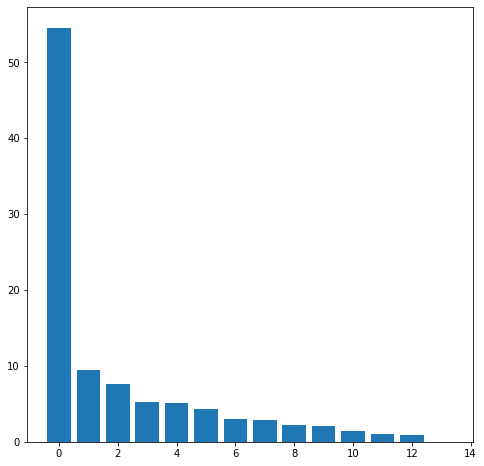

In [66]:
plt.figure(figsize = (8,8))
plt.bar(list(range(14)),eig_values/np.sum(eig_values) * 100)
plt.show()

In [69]:
#pourcentage of the first two axes
(eig_values[0]+eig_values[1])/np.sum(eig_values) * 100 
#前两坐标占了一半以上

64.00083985496072

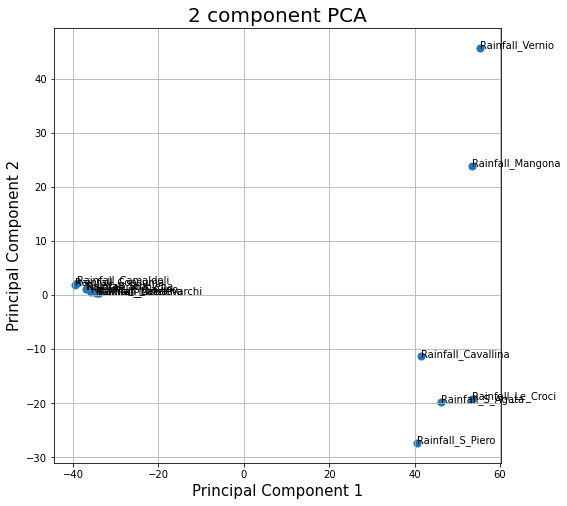

In [73]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

features = ['Rainfall_Le_Croci','Rainfall_Cavallina','Rainfall_S_Agata','Rainfall_Mangona','Rainfall_S_Piero','Rainfall_Vernio','Rainfall_Stia','Rainfall_Consuma','Rainfall_Incisa','Rainfall_Montevarchi','Rainfall_S_Savino','Rainfall_Laterina','Rainfall_Bibbiena','Rainfall_Camaldoli']

ax.scatter(principalDF.loc[:, 0]
            , principalDF.loc[:, 1]
            , s = 50)

for i, txt in enumerate(features):
    ax.annotate(txt, (principalDF.loc[i, 0], principalDF.loc[i, 1]))

ax.grid()

The results of principal component analysis show that we can indeed categorize the different points to two categories.

In [74]:
cols = ['Year','Date', 'Rainfall_Le_Croci', 'Rainfall_Cavallina', 'Rainfall_S_Agata', 'Rainfall_Mangona', 'Rainfall_S_Piero', 'Rainfall_Vernio', 'Rainfall_Stia', 'Rainfall_Consuma', 'Rainfall_Incisa', 'Rainfall_Montevarchi', 'Rainfall_S_Savino', 'Rainfall_Laterina', 'Rainfall_Bibbiena', 'Rainfall_Camaldoli', 'Temperature_Firenze', 'Day', 'Month', 'Hydrometry_Nave_di_Rosano']
arno_1 = arno_1[cols]
arno_1.head()


,Year,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Day,Month,Hydrometry_Nave_di_Rosano
2191,2004,01/01/2004,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,8.65,01,01,1.84
2192,2004,02/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,7.10,02,01,1.93
2193,2004,03/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.0,5.50,03,01,1.61
2194,2004,04/01/2004,0.0,0.0,0.0,0.8,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.55,04,01,1.35
2195,2004,05/01/2004,7.8,5.6,3.8,5.8,4.6,7.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,05,01,1.44


#### 决策树模型

In [117]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from xgboost import XGBRegressor

In [76]:
arno_model = arno_1.iloc[:,2:].values

In [77]:
X_input, y = arno_model[:,:-1],arno_model[:,-1]

In [81]:
scaler = MinMaxScaler(feature_range=(0,1))#TODO: MinMax怎么做到了全体数据上了？

In [82]:
X_input = scaler.fit_transform(X_input)

In [86]:
X_train, X_test, y_train,y_test = train_test_split(X_input,y,train_size = 0.82, shuffle=True)

In [87]:
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

In [89]:
gbr = GradientBoostingRegressor(learning_rate = 0.01, n_estimators = 500)

In [90]:
gbr_model = gbr.fit(X_train,y_train)

In [91]:
y_pred = gbr_model.predict(X_test)

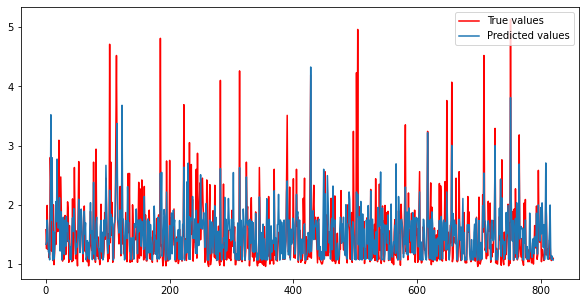

In [92]:
#看模型效果
plt.figure(figsize = (10,5))
plt.plot(y_test, 'r', label='True values')
plt.plot(y_pred, label= 'Predicted values')
plt.legend()
plt.show()

In [95]:
mae = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % mae)

mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % mse)

MAE: 0.280
MSE: 0.182


### NN模型

In [100]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.001), loss='mse')

In [101]:
X_train.shape

(3739, 17)

In [102]:
r = model.fit(X_train,y_train,batch_size = 32, epochs=30)

Train on 3739 samples
Epoch 1/30
3739/3739 [==============================] - 2s 404us/sample - loss: 0.4712
Epoch 2/30
3739/3739 [==============================] - 1s 150us/sample - loss: 0.2223
Epoch 3/30
3739/3739 [==============================] - 1s 154us/sample - loss: 0.2185
Epoch 4/30
3739/3739 [==============================] - 1s 144us/sample - loss: 0.2029
Epoch 5/30
3739/3739 [==============================] - 1s 145us/sample - loss: 0.2003
Epoch 6/30
3739/3739 [==============================] - 1s 152us/sample - loss: 0.1972
Epoch 7/30
3739/3739 [==============================] - 1s 147us/sample - loss: 0.1947
Epoch 8/30
3739/3739 [==============================] - 1s 154us/sample - loss: 0.1917
Epoch 9/30
3739/3739 [==============================] - 1s 165us/sample - loss: 0.1836
Epoch 10/30
3739/3739 [==============================] - 1s 176us/sample - loss: 0.1860
Epoch 11/30
3739/3739 [==============================] - 1s 171us/sample - loss: 0.1799
Epoch 12/30
3739/37

In [103]:
y_pred = model.predict(X_test)

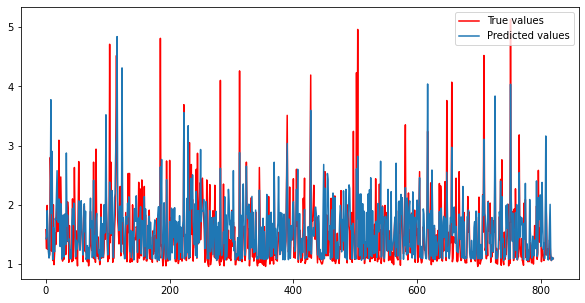

In [104]:
plt.figure(figsize = (10,5))
plt.plot(y_test, 'r', label='True values')
plt.plot(y_pred, label= 'Predicted values')
plt.legend()
plt.show()


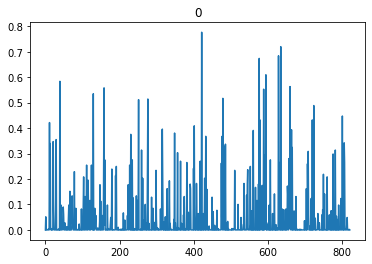

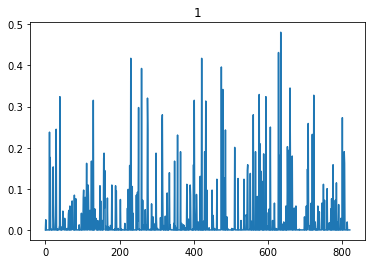

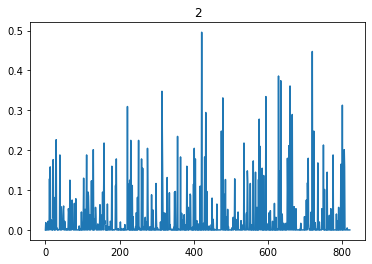

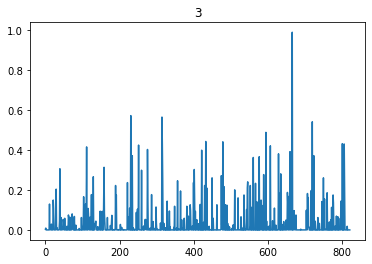

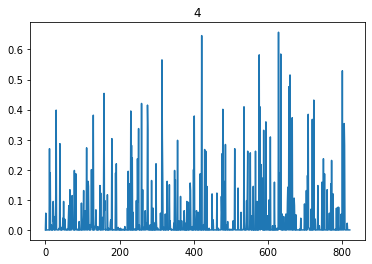

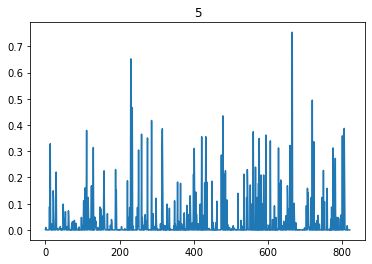

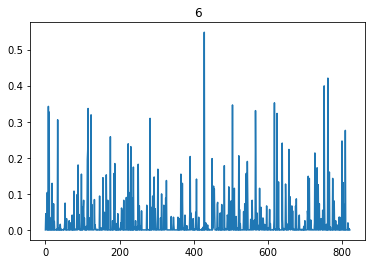

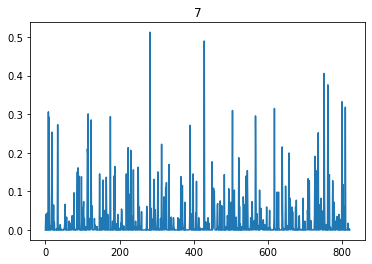

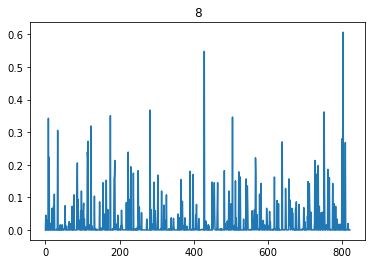

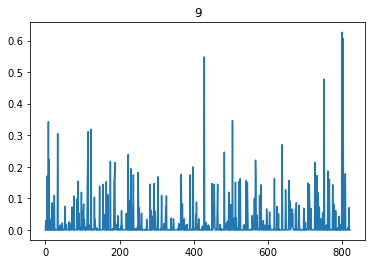

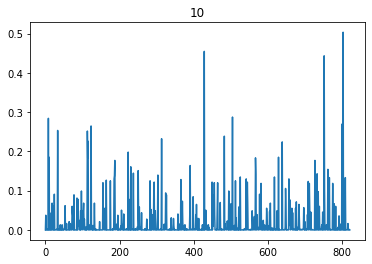

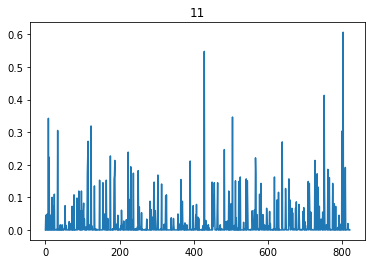

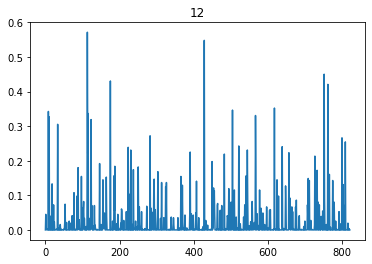

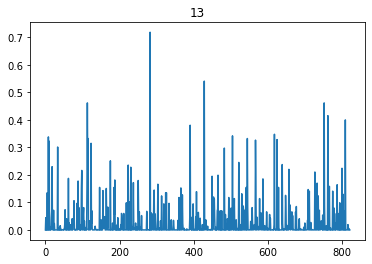

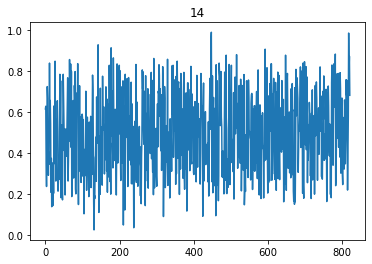

In [105]:
for i in range(15):
    plt.figure(i)
    plt.plot(X_test[:,i])
    plt.title(i)

In [106]:
mae = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % mae)

mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % mse)

MAE: 0.307
MSE: 0.203


### 借助上面的PCA分析

选用第二类

In [111]:
arno_model = arno_1.iloc[:,[6,7,10,16,17,18,19]].values

In [112]:
X, y = arno_model[:, :-1],  arno_model[:, -1]
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.82, shuffle = False)

# Cat Boost Regressor

gbr = GradientBoostingRegressor()
gbr_model = gbr.fit(X_train,y_train)

In [113]:
y_pred = gbr_model.predict(X_test)

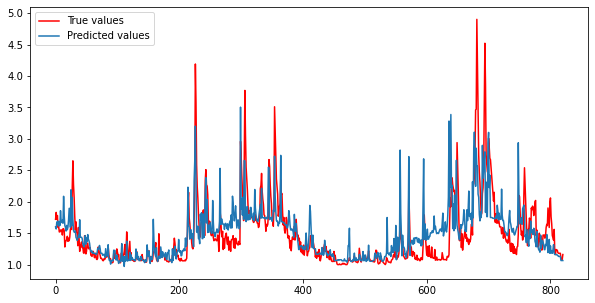

In [114]:
plt.figure(figsize = (10,5))
plt.plot(y_test, 'r', label='True values')
plt.plot(y_pred, label= 'Predicted values')
plt.legend()
plt.show()

In [115]:
mae = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % mae)

mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % mse)

MAE: 0.223
MSE: 0.124
